In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

Read the data

In [3]:
df=pd.read_excel('customer_detail.xlsx')
# The first five rows of data in a tabular format
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [27]:
df1=pd.read_excel('customer_codesheet.xlsx')
# The first five rows of data in a tabular format
df1.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


Data Transformation and cleaning

In [4]:
# Row, column count of data
data = df.shape
pd.DataFrame(data, index = ["Records","Variables"],columns = ["Size"])

,Size
Records,269
Variables,71


In [5]:
# Check data type of columns/attributes
pd.DataFrame(df.dtypes, columns = ["Data Type"])

,Data Type
1Gender of respondent,object
2 How old are you?,object
3 Which city do you shop online from?,object
4 What is the Pin Code of where you shop online from?,int64
5 Since How Long You are Shopping Online ?,object
...,...
Longer delivery period,object
Change in website/Application design,object
Frequent disruption when moving from one page to another,object
Website is as efficient as before,object


In [6]:
#Generally, the columns tied with data type “int64” and “float64” denotes numerical data while data type “object” and "datetime64[ns]" denotes categorical data.

Renaming columns to something meaningful for analysis

In [14]:
df.rename(columns={'1Gender of respondent':'Gender',
                          '2 How old are you? ':'Age',
                          '3 Which city do you shop online from?':'City',
                  '4 What is the Pin Code of where you shop online from?':'Pincode',
                 '5 Since How Long You are Shopping Online ?' :'No. of years shopping',
                  '6 How many times you have made an online purchase in the past 1 year?':'No of online purchases last year',
                  '7 How do you access the internet while shopping on-line?':'Internet Access',
                  '8 Which device do you use to access the online shopping?':'Device',
'9 What is the screen size of your mobile device?':'Mobile Screen size',
                  '10 What is the operating system (OS) of your device?':'OS','11 What browser do you run on your device to access the website?':'Browser',
                   '12 Which channel did you follow to arrive at your favorite online store for the first time?':'Channel accessed',                                                                  
'13 After first visit, how do you reach the online retail store?':'Medium online retail store',
'14 How much time do you explore the e- retail store before making a purchase decision?':' Time spent on e-retail store',
                   '15 What is your preferred payment Option?':'Preferred Payment',
                   '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?':'Frequency of abandoning items',
                   '17 Why did you abandon the “Bag”, “Shopping Cart"?':'Reason of abandoning item',
                   '18 The content on the website must be easy to read and understand':'Content on website',
                   '19 Information on similar product to the one highlighted  is important for product comparison':'Information on similar product',
                   '20 Complete information on listed seller and product being offered is important for purchase decision':'Seller and product info',
                   '21 All relevant information on listed products must be stated clearly':'Product Information',
                   '22 Ease of navigation in website':'Ease of navigation',
                   '23 Loading and processing speed':'Loading and processing speed',
                   '24 User friendly Interface of the website':'User friendly interface',
                   '25 Convenient Payment methods':'Convinient Payment methods',
                   '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust',
                   '27 Empathy (readiness to assist with queries) towards the customers':'Empathy with customers',
                   '28 Being able to guarantee the privacy of the customer':'Customer Privacy',
                   '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Responsiveness &availability',
                   '30 Online shopping gives monetary benefit and discounts':'Monetary gifts & discounts',
                   '31 Enjoyment is derived from shopping online':'Enjoyment factor',
                   '32 Shopping online is convenient and flexible':'Shopping online',
                   '33 Return and replacement policy of the e-tailer is important for purchase decision':'Return & Replacement',
                   '34 Gaining access to loyalty programs is a benefit of shopping online':'Access to loyalty program',
                   '35 Displaying quality Information on the website improves satisfaction of customers':'quality information improves satisfaction of customers',
                   '36 User derive satisfaction while shopping on a good quality website or application':'User derive satisfaction',
                   '37 Net Benefit derived from shopping online can lead to users satisfaction':'Net benefit',
                   '38 User satisfaction cannot exist without trust':'User satisfaction without trust',
                   '39 Offering a wide variety of listed product in several category':'Offering variety',
                   '40 Provision of complete and relevant product information':'Complete and relevant product Info',
                   '41 Monetary savings':'Monetary savings',
                   '42 The Convenience of patronizing the online retailer':'patronizing the online retailer',
                   '43 Shopping on the website gives you the sense of adventure':'Adventure factor',
                   '44 Shopping on your preferred e-tailer enhances your social status':'Social status',
                   '45 You feel gratification shopping on your favorite e-tailer':'Gratification',
                   '46 Shopping on the website helps you fulfill certain roles':'Fufill roles',
                   '47 Getting value for money spent':'Value for money'}, inplace=True)

In [30]:
#Renaming the columns in codesheet

In [28]:
df1.rename(columns={'1Gender of respondent':'Gender',
                          '2 How old are you? ':'Age',
                          '3 Which city do you shop online from?':'City',
                  '4 What is the Pin Code of where you shop online from?':'Pincode',
                 '5 Since How Long You are Shopping Online ?' :'No. of years shopping',
                  '6 How many times you have made an online purchase in the past 1 year?':'No of online purchases last year',
                  '7 How do you access the internet while shopping on-line?':'Internet Access',
                  '8 Which device do you use to access the online shopping?':'Device',
'9 What is the screen size of your mobile device?':'Mobile Screen size',
                  '10 What is the operating system (OS) of your device?':'OS','11 What browser do you run on your device to access the website?':'Browser',
                   '12 Which channel did you follow to arrive at your favorite online store for the first time?':'Channel accessed',                                                                  
'13 After first visit, how do you reach the online retail store?':'Medium online retail store',
'14 How much time do you explore the e- retail store before making a purchase decision?':' Time spent on e-retail store',
                   '15 What is your preferred payment Option?':'Preferred Payment',
                   '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?':'Frequency of abandoning items',
                   '17 Why did you abandon the “Bag”, “Shopping Cart"?':'Reason of abandoning item',
                   '18 The content on the website must be easy to read and understand':'Content on website',
                   '19 Information on similar product to the one highlighted  is important for product comparison':'Information on similar product',
                   '20 Complete information on listed seller and product being offered is important for purchase decision':'Seller and product info',
                   '21 All relevant information on listed products must be stated clearly':'Product Information',
                   '22 Ease of navigation in website':'Ease of navigation',
                   '23 Loading and processing speed':'Loading and processing speed',
                   '24 User friendly Interface of the website':'User friendly interface',
                   '25 Convenient Payment methods':'Convinient Payment methods',
                   '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'Trust',
                   '27 Empathy (readiness to assist with queries) towards the customers':'Empathy with customers',
                   '28 Being able to guarantee the privacy of the customer':'Customer Privacy',
                   '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'Responsiveness &availability',
                   '30 Online shopping gives monetary benefit and discounts':'Monetary gifts & discounts',
                   '31 Enjoyment is derived from shopping online':'Enjoyment factor',
                   '32 Shopping online is convenient and flexible':'Shopping online',
                   '33 Return and replacement policy of the e-tailer is important for purchase decision':'Return & Replacement',
                   '34 Gaining access to loyalty programs is a benefit of shopping online':'Access to loyalty program',
                   '35 Displaying quality Information on the website improves satisfaction of customers':'quality information improves satisfaction of customers',
                   '36 User derive satisfaction while shopping on a good quality website or application':'User derive satisfaction',
                   '37 Net Benefit derived from shopping online can lead to users satisfaction':'Net benefit',
                   '38 User satisfaction cannot exist without trust':'User satisfaction without trust',
                   '39 Offering a wide variety of listed product in several category':'Offering variety',
                   '40 Provision of complete and relevant product information':'Complete and relevant product Info',
                   '41 Monetary savings':'Monetary savings',
                   '42 The Convenience of patronizing the online retailer':'patronizing the online retailer',
                   '43 Shopping on the website gives you the sense of adventure':'Adventure factor',
                   '44 Shopping on your preferred e-tailer enhances your social status':'Social status',
                   '45 You feel gratification shopping on your favorite e-tailer':'Gratification',
                   '46 Shopping on the website helps you fulfill certain roles':'Fufill roles',
                   '47 Getting value for money spent':'Value for money'}, inplace=True)

In [15]:
df

,Gender,Age,City,Pincode,No. of years shopping,No of online purchases last year,Internet Access,Device,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [16]:
# Check if there are any missing values in the data
pd.DataFrame(df.isnull().sum(), columns = ["Missing values"])

,Missing values
Gender,0
Age,0
City,0
Pincode,0
No. of years shopping,0
...,...
Longer delivery period,0
Change in website/Application design,0
Frequent disruption when moving from one page to another,0
Website is as efficient as before,0


In [20]:
df.isnull().values.any()

False

In [18]:
# Details of data tyoes for each variable in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   Gender                                                                                                                                                                                                          269 non-null    object
 1   Age                                                                                                                                                                                   

DESCRIPTIVE DATA ANALYSIS

Numerical data

In [21]:
df.describe()

,Pincode
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [23]:
#Other than pincode all values are categorical and the values in pincode does not make sense to calculate mean/standard deviation on them

CATEGORICAL DATA

In [24]:
df.describe(include=['object'])

,Gender,Age,City,No. of years shopping,No of online purchases last year,Internet Access,Device,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269,269,269,269,269,269,269,269,269,269,...,269,269,269,269,269,269,269,269,269,269
unique,2,5,11,5,6,4,4,4,3,4,...,10,10,8,11,8,6,7,8,8,8
top,Female,31-40 years,Delhi,Above 4 years,Less than 10 times,Mobile internet,Smartphone,Others,Window/windows Mobile,Google chrome,...,Amazon.in,"Amazon.in, Flipkart.com",Myntra.com,Myntra.com,Snapdeal.com,Paytm.com,Amazon.in,Amazon.in,Amazon.in,Amazon.in
freq,181,81,58,98,114,142,141,134,122,216,...,57,60,75,61,87,72,96,53,94,79


EXPLORATORY DATA ANALYSIS

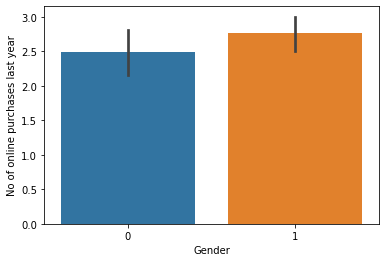

In [29]:
sns.barplot(x='Gender', y='No of online purchases last year', data=df1)

In [31]:
#0- Male , 1-Female as per details in detailsheet and used the codesheet to plot the graph.This shows that number of females using ecommerce are more than the Men so gender also does play a role

AGE

Lets Take a look if Age plays an important role

In [32]:
df['Age'].value_counts()

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64

In [33]:
df1['Age'].value_counts()

3    81
2    79
4    70
1    20
5    19
Name: Age, dtype: int64

Lets plot a graph and see how a particular age group was involved in purchases last year

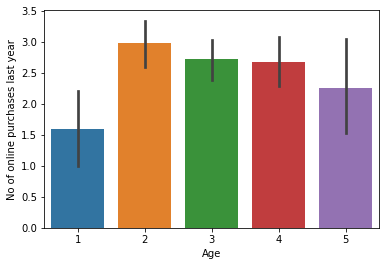

In [34]:
sns.barplot(x='Age', y='No of online purchases last year', data=df1)

In [35]:
#Looks like the age group of 21-30 Years, followed by 31-40 yrs,41-50 yrs,51+ and last but not the least less than 20 years is the most involved in purchases usually.We just tried to analyse by keeping in mind the purchases made last year

As seen in the graph above we can see that the maximum number of purchases made in the last year are in the age group 21-30 years  followed by 31-40 yrs,41-50 yrs,51+ and last but not the least less than 20 years.This may be due to a lot of factors involving the socio economic status of the working population, ease of using latest technologies,convinience,lack of time etc

CITY

In [37]:
#From the detailsheet
df['City'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64

In [38]:
#From the codesheet
df1['City'].value_counts()

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64

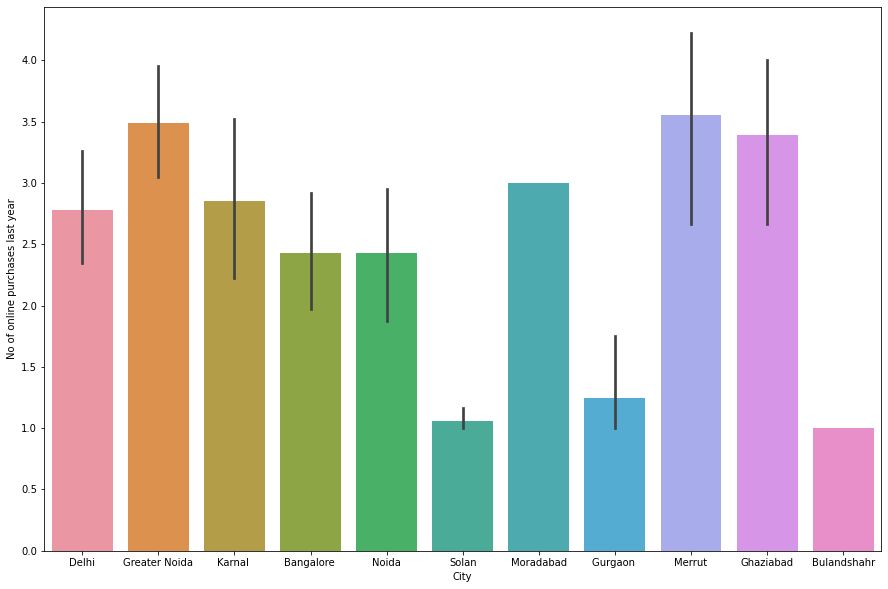

In [40]:
f, ax = plt. subplots(1, 1, figsize = (15, 10))
sns.barplot(x='City', y='No of online purchases last year', data=df1,ax=ax)

In [41]:
#This describes the online purchases in last year based on city and we could see distribution of purchases across city .Ecommerce being prevalent in any city 
#depends on many factors ,for example the convinience of shopping,range of products available,options,money savings, rewards 

HOW LONG YOU ARE SHOPPING

In [43]:
df['No. of years shopping'].value_counts()

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: No. of years shopping, dtype: int64

In [44]:
df1['No. of years shopping'].value_counts()

5    98
3    65
4    47
1    43
2    16
Name: No. of years shopping, dtype: int64

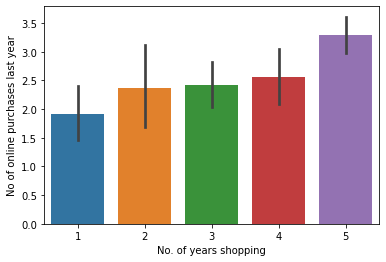

In [45]:
sns.barplot(x='No. of years shopping', y='No of online purchases last year', data=df1)

People who are shopping more number of years have shopped the maximum in last year shows that customer trust,reliability,convinience plays an important role in purchases

How do you access the internet while shopping on-line?


Lets check on how internet access plays an important role in online purchases

In [51]:
df['Internet Access'].value_counts()

Mobile internet    189
Wi-Fi               76
Dial-up              4
Name: Internet Access, dtype: int64

In [47]:
df1['Internet Access'].value_counts()

3    118
2     76
5     71
4      4
Name: Internet Access, dtype: int64

In [48]:
#This shows that we have the same value in two fonts hence  will process it for better analysis

In [50]:
df['Internet Access'] = df['Internet Access'].replace({"Mobile Internet": "Mobile internet"})

In [52]:
df['Internet Access'].value_counts()

Mobile internet    189
Wi-Fi               76
Dial-up              4
Name: Internet Access, dtype: int64

In [55]:
df1['Internet Access'] = df1['Internet Access'].replace({5: 3})

In [56]:
df1['Internet Access'].value_counts()

3    189
2     76
4      4
Name: Internet Access, dtype: int64

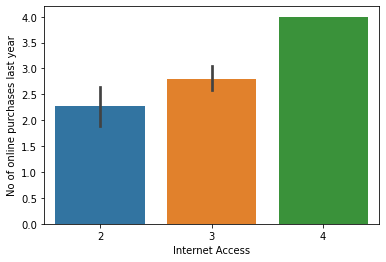

In [57]:
sns.barplot(x='Internet Access', y='No of online purchases last year', data=df1)

This shows that people who used dial ups have made max purchases in last year which may be due to various factors ie the device they are using ,convinience,trust,privacy etc so lets see what device is used most often by users 

DEVICE

In [60]:
df['Device'].value_counts()

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Device, dtype: int64

In [61]:
df1['Device'].value_counts()

1    141
2     86
3     30
4     12
Name: Device, dtype: int64

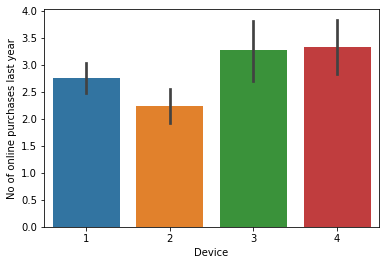

In [62]:
sns.barplot(x='Device', y='No of online purchases last year', data=df1)

People are more comfortable shopping online when using desktop or tablet when compared to mobile phones,laptops

9 What is the screen size of your mobile device?						                                        "


In [63]:
df['9 What is the screen size of your mobile device?						                                        '].value_counts()

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64

In [64]:
df1['9 What is the screen size of your mobile device?						                                        '].value_counts()

5    134
4    106
2     29
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64

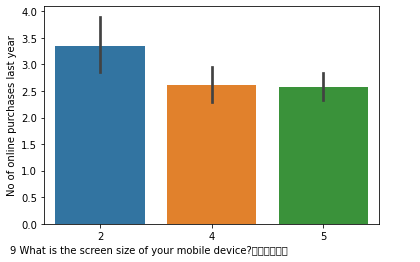

In [66]:
sns.barplot(x='9 What is the screen size of your mobile device?						                                        ', y='No of online purchases last year', data=df1)

Smaller screen sizes  are preferred however there is not a huge difference and various devices are used .The difference may be just due to the mere fact that mobile sizes 4.7 inches standard are available with almost everybody and hence it is being extensively used and also the convinience of being using it anyehere anytime

OPERATING SYSTEM                                       "


In [67]:
df['10 What is the operating system (OS) of your device?				                                          '].value_counts()

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64

In [68]:
df1['10 What is the operating system (OS) of your device?				                                          '].value_counts()

1    122
2     85
3     62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64

Lets see how the devices are related to purchases

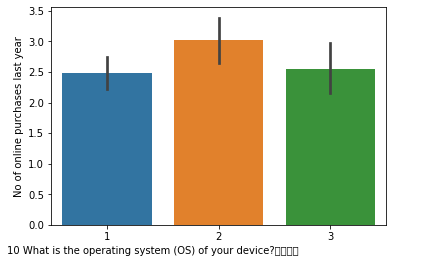

In [69]:
sns.barplot(x='10 What is the operating system (OS) of your device?				                                          ', y='No of online purchases last year', data=df1)

This clearly indicates that the most online purchases are done from android cause it may be so because mobile/tablets as we saw is one of popular methods and this might be the operating system which is available even in mobiles which are relatively cheaper than ios/mac and is most extensively used by thed population

BROWSERS USED

Lets explore the browsers which have been used and try to see what was most majorly used in the last year purchases just to know whats commonly used or preferred

In [70]:
df['11 What browser do you run on your device to access the website?			                                                          '].value_counts()

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64

In [71]:
df1['11 What browser do you run on your device to access the website?			                                                          '].value_counts()

1    216
2     40
4      8
3      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64

LETS TAKE A LOOK AT IT WHICH BROWSERS ARE USED MOST COMMONLY OVER LAST YEAR PURCHASES

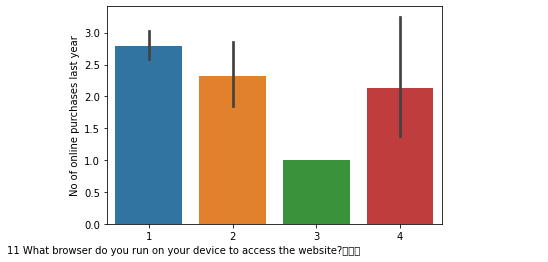

In [72]:
sns.barplot(x='11 What browser do you run on your device to access the website?			                                                          ', y='No of online purchases last year', data=df1)

FROM THE ABOVE LOOKS LIKE Google chrome,followed by Safari, Opera and mozilla firefox are  the most sought after depending on easy availability,accessibility

Lets Explore the variable Time spent on e-retail store

In [74]:
df['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '].value_counts()

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64

In [75]:
df1['14 How much time do you explore the e- retail store before making a purchase decision?                                                                   '].value_counts()

5    123
3     71
4     46
1     15
2     14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64

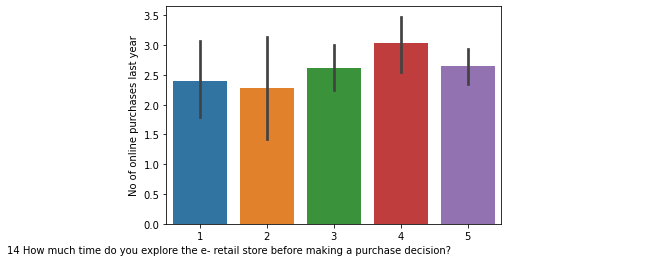

In [76]:
sns.barplot(x='14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ', y='No of online purchases last year', data=df1)

The above graph clearly shows that spending more time has nothing to do really with purchases as last year most purchases have been done by people who spend less than 1 min

In [77]:
df['15 What is your preferred payment Option?					                                                                                                                               '].value_counts()


Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64

In [78]:
df1['15 What is your preferred payment Option?					                                                                                                                               '].value_counts()


1    148
2     76
4     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64

Lets see what payment options are most likely preferred.Lets see what methods were used over last year purchases mostly

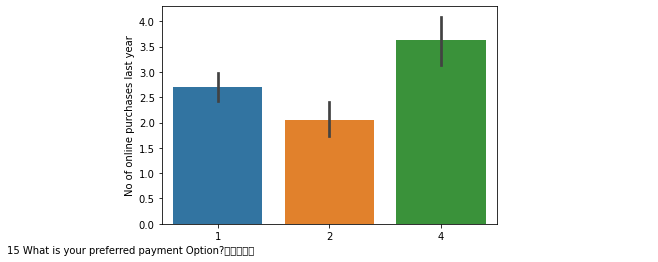

In [79]:
sns.barplot(x='15 What is your preferred payment Option?					                                                                                                                               ', y='No of online purchases last year', data=df1)

Clearly shows that online payment methods are mostly preferred like E-wallets (Paytm, Freecharge etc., followed by credit/debit cards .Cash on delivery is the least preferred 

How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart							                                                   

Lets explore the variable

In [81]:
df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                   '].value_counts()

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: 16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64

From the above we can see that there are very few people who abandon items in the cart very frequently

Why did you abandon the “Bag”, “Shopping Cart”?


Lets explore the variable on reasons why the shopping cart is abandoned usually by customers

In [83]:
df['17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                       '].value_counts()

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64

The most prevalent reason  of abandoning bag  is finding better alternative offer, followed by promo code not available,price change,lack of trust, mode of payment . This clearly indicates that customers pay more attention to better pricing / deals , offers available, price and trust 

18 The content on the website must be easy to read and understand.Lets explore the variable in both the dataframes(details as well as codesheet to understand the relationship and know more about what customers think


In [85]:
df['Content on website'].value_counts()

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: Content on website, dtype: int64

In [86]:
df1['Content on website'].value_counts()

5    164
4     80
1     18
3      7
Name: Content on website, dtype: int64

The cell clearly shows that users prefer the content on the website which is easy to use and understand.A very small percentage of people are indifferent or diagree.Lets also see how the purchases made last year 

In [92]:
content_on_website = df['Content on website'].value_counts()

In [93]:
print(content_on_website)

Strongly agree (5)       164
Agree (4)                 80
Strongly disagree (1)     18
Indifferent (3)            7
Name: Content on website, dtype: int64


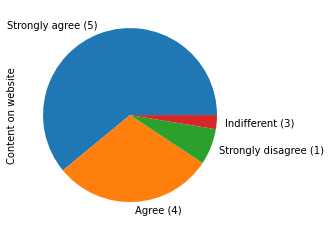

In [94]:
content_on_website.plot(kind='pie')

19 Information on similar product to the one highlighted  is important for product comparison


In [95]:
df['Information on similar product'].value_counts()

Strongly agree (5)    116
Agree (4)              92
Indifferent (3)        43
Dis-agree (2)          18
Name: Information on similar product, dtype: int64

In [96]:
df1['Information on similar product'].value_counts()

5    116
4     92
3     43
2     18
Name: Information on similar product, dtype: int64

In [97]:
Information_on_similar_product=df['Information on similar product'].value_counts()

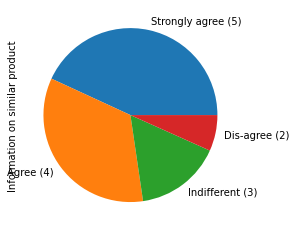

In [98]:
Information_on_similar_product.plot(kind='pie')

As per the above graph we can see that people prefer information on similar products to understand what are the various options available and the best one can be chosen . 

20 Complete information on listed seller and product being offered is important for purchase decision.


In [100]:
df['20 Complete information on listed seller and product being offered is important for purchase decision.'].value_counts()

Agree (4)                101
Strongly agree (5)        87
Indifferent (3)           52
Dis-agree (2)             18
Strongly disagree (1)     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64

In [101]:
df1['20 Complete information on listed seller and product being offered is important for purchase decision.'].value_counts()

4    101
5     87
3     52
2     18
1     11
Name: 20 Complete information on listed seller and product being offered is important for purchase decision., dtype: int64

In [102]:
Seller_and_product_info=df['20 Complete information on listed seller and product being offered is important for purchase decision.'].value_counts()

Text(0.5, 1.0, 'Seller and product info')

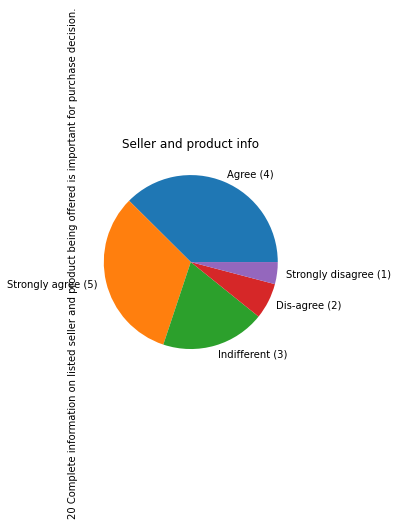

In [104]:
ax=Seller_and_product_info.plot(kind='pie')
ax.set_title("Seller and product info")

This clearly shows that majority people would like to have complete information on seller and product being offered since it helps customers to make better purchase decision

21 All relevant information on listed products must be stated clearly


In [106]:
df['Product Information'].value_counts()

Agree (4)                132
Strongly agree (5)       107
Strongly disagree (1)     18
Dis-agree (2)             12
Name: Product Information, dtype: int64

In [107]:
df1['Product Information'].value_counts()

4    132
5    107
1     18
2     12
Name: Product Information, dtype: int64

In [108]:
Product_information=df['Product Information'].value_counts()

Text(0.5, 1.0, 'Product information')

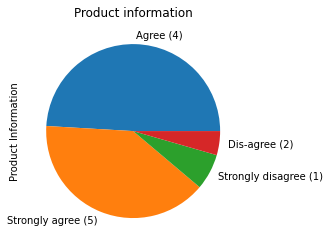

In [109]:
ax=Product_information.plot(kind='pie')
ax.set_title("Product information")

This clearly shows that majority of people prefer to have all relevant information to be stated clearly cause that helps them to make better purchase decision

22 Ease of navigation in website


In [110]:
df['Ease of navigation'].value_counts()

Strongly agree (5)       141
Agree (4)                105
Strongly disagree (1)     18
Dis-agree (2)              5
Name: Ease of navigation, dtype: int64

In [111]:
df1['Ease of navigation'].value_counts()

5    141
4    105
1     18
2      5
Name: Ease of navigation, dtype: int64

In [112]:
Ease_of_navigation=df['Ease of navigation'].value_counts()

Text(0.5, 1.0, 'Ease of navigation')

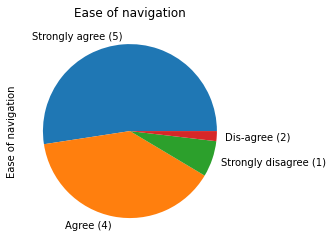

In [113]:
ax=Ease_of_navigation.plot(kind='pie')
ax.set_title("Ease of navigation")

The graph above clearly shows that most users agree that they prefer websites which provide ease of navigation

23 Loading and processing speed


In [114]:
df['Loading and processing speed'].value_counts()

Strongly agree (5)       115
Agree (4)                112
Dis-agree (2)             18
Indifferent (3)           12
Strongly disagree (1)     12
Name: Loading and processing speed, dtype: int64

In [115]:
Loading_and_processing_speed=df['Loading and processing speed'].value_counts()

Text(0.5, 1.0, 'Loading and processing speed')

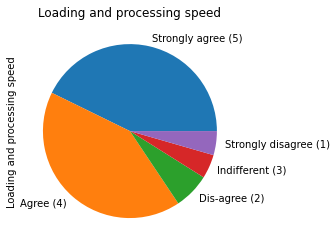

In [116]:
ax=Loading_and_processing_speed.plot(kind='pie')
ax.set_title("Loading and processing speed")

As the above graph shows people mostly either strongly agree or agree that loading and processing speed is imperative for the best experience of online shopping

User Friendly interface of website

Lets check how many users prefer userfriendliness for wsebsites they use to shop

In [117]:
df['User friendly interface'].value_counts()

Strongly agree (5)       189
Agree (4)                 45
Strongly disagree (1)     18
Dis-agree (2)             12
Indifferent (3)            5
Name: User friendly interface, dtype: int64

In [118]:
User_friendly_interface=df['User friendly interface'].value_counts()

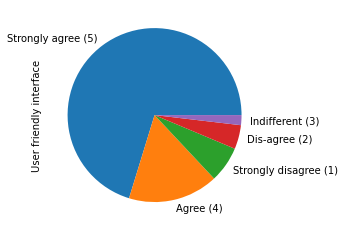

In [119]:
User_friendly_interface.plot(kind='pie')

From the graph above it clearly shows that people across ages, location prefer user friendly behaviour of the websites used for ecommerce

Convinient Payment methods

In [120]:
df['Convinient Payment methods'].value_counts()

Strongly agree (5)    159
Agree (4)              80
Dis-agree (2)          30
Name: Convinient Payment methods, dtype: int64

In [121]:
Convinient_payment_methods=df['Convinient Payment methods'].value_counts()

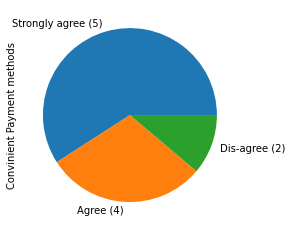

In [122]:
Convinient_payment_methods.plot(kind='pie')

The above pie chart clearly shows that people prefer convinient payment methods . only a very small  portion of the population disagree on this

TRUST

In [124]:
df['Trust'].value_counts()

Strongly agree (5)    141
Agree (4)              86
Disagree (2)           30
indifferent  (3)       12
Name: Trust, dtype: int64

In [125]:
Trust=df['Trust'].value_counts()

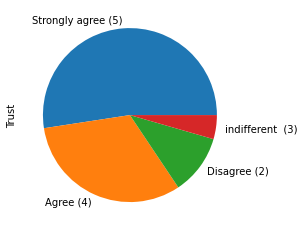

In [126]:
Trust.plot(kind='pie')

As per the above pie chart ,it is clearly evident that people prefer trustworthy websites .Trust is one of the major factors of customer satisfaction 

Empathy with customer

In [128]:
df['Empathy with customers'].value_counts()

Strongly agree (5)       194
Agree (4)                 42
Strongly disagree (1)     18
indifferent (3)           15
Name: Empathy with customers, dtype: int64

In [129]:
Empathy_with_customers=df['Empathy with customers'].value_counts()

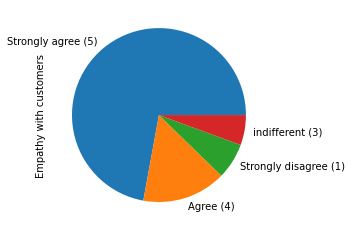

In [130]:
Empathy_with_customers.plot(kind='pie')

Above pie chart clearly shows that customers prefer sellers/websites who have empathy towards cujstomers, have proper employee assistance channels 

Customer Privacy

In [132]:
df['Customer Privacy'].value_counts()

Strongly agree (5)    185
Agree (4)              58
indifferent (3)        26
Name: Customer Privacy, dtype: int64

In [133]:
Customer_privacy=df['Customer Privacy'].value_counts()

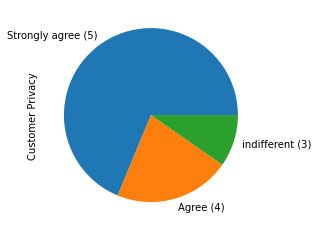

In [134]:
Customer_privacy.plot(kind='pie')

As per the above pie chart customer privacy is of utmost importance to customers.Being able to guarantee the privacy of the customer is one of the most important factors in user satisfaction


Responsiveness &availability

29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.).Lets explore the variable to see how the customers respond to responsiveness and availability


In [135]:
df['Responsiveness &availability'].value_counts()

Strongly agree (5)       149
Agree (4)                 94
indifferent (3)           15
Strongly disagree (1)     11
Name: Responsiveness &availability, dtype: int64

In [136]:
Responsiveness_availability=df['Responsiveness &availability'].value_counts()

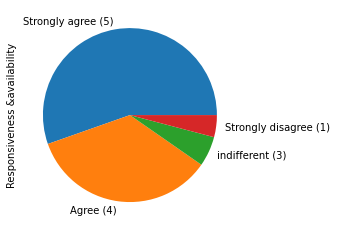

In [137]:
Responsiveness_availability.plot(kind='pie')

30 Online shopping gives monetary benefit and discounts


Lets explore the variable to understand that how consumers are affected because of this. Do maximum customers beleive that online shopping gives monetary benefit and discounts

In [139]:
df['Monetary gifts & discounts'].value_counts()

Strongly agree (5)       105
Agree (4)                 85
indifferent (3)           50
Strongly disagree (1)     18
Dis-agree (2)             11
Name: Monetary gifts & discounts, dtype: int64

In [140]:
opinion_monetary_gifts_discounts_onlineshopping=df['Monetary gifts & discounts'].value_counts()

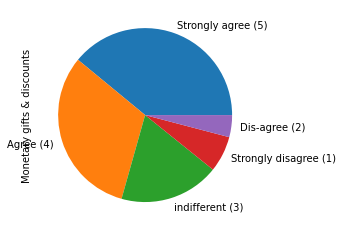

In [141]:
opinion_monetary_gifts_discounts_onlineshopping.plot(kind='pie')

People strongly beleive that online shopping gives monetary benefits and discounts

Lets also try to see how it is related to the purchases made last year

31 Enjoyment is derived from shopping online.Lets explore the variable and see that what does the majority of population surveyed thinks. Does online shopping also give a sense of enjoyment

In [144]:
df['Enjoyment factor'].value_counts()

Strongly agree (5)       86
indifferent (3)          75
Agree (4)                59
Strongly disagree (1)    30
Dis-agree (2)            19
Name: Enjoyment factor, dtype: int64

In [145]:
Enjoyment_factor=df['Enjoyment factor'].value_counts()

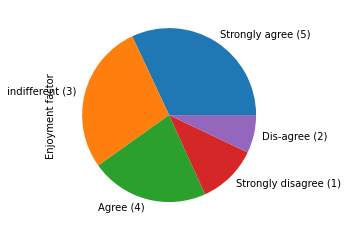

In [146]:
Enjoyment_factor.plot(kind='pie')

Majority population agree that they do find enjoyment on shopping online.

32 Shopping online is convenient and flexible':'Shopping online'.Lets explore the variable and see what majority customers think. Do majority of the customers  beleive that shopping online is convinient and flexible?

In [148]:
df['Shopping online'].value_counts()

Strongly agree (5)    146
Agree (4)              78
indifferent (3)        33
Dis-agree (2)          12
Name: Shopping online, dtype: int64

In [149]:
Shopping_online_convinience=df['Shopping online'].value_counts()

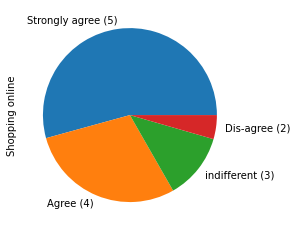

In [150]:
Shopping_online_convinience.plot(kind='pie')

Majority of the people do agree that shopping online gives lot of convinience and is flexible . It does releive the customers from travelling long distances,gives them better pricing,monetary benefits ,also com plete information on similar products and hence convinient too

33 Return and replacement policy of the e-tailer is important for purchase decision:'Return & Replacement'.Lets explore this variable to understand how does this aspect regulate the customer behaviour and purchase decision


In [152]:
df['Return & Replacement'].value_counts()

Strongly agree (5)    198
Agree (4)              51
Dis-agree (2)          20
Name: Return & Replacement, dtype: int64

In [153]:
Return_and_replacement=df['Return & Replacement'].value_counts()

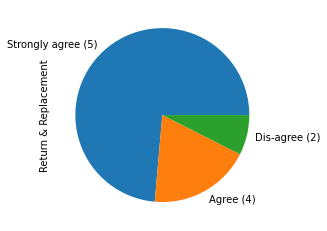

In [154]:
Return_and_replacement.plot(kind='pie')

Majority of customers who shop online do consider  thatthe Return and replacement policy of the e-tailer is important for purchase decision

34 Gaining access to loyalty programs is a benefit of shopping online.Lets explore the variable tounderstand what the customers think? Do they consider it as a benefit?


In [155]:
df['Access to loyalty program'].value_counts()

Strongly agree (5)       115
indifferent (3)           64
Agree (4)                 64
Dis-agree (2)             15
Strongly disagree (1)     11
Name: Access to loyalty program, dtype: int64

In [156]:
Access_to_loyalty_programs=df['Access to loyalty program'].value_counts()

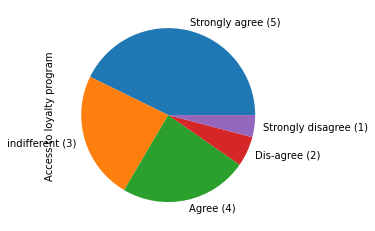

In [157]:
Access_to_loyalty_programs.plot(kind='pie')

Customers beleive that access to loyalty programs is  benefit of shopping online

35 Displaying quality Information on the website improves satisfaction of customers.Lets explore the data and see what customers think


In [158]:
df['quality information improves satisfaction of customers'].value_counts()

Strongly agree (5)    133
Agree (4)              80
indifferent (3)        56
Name: quality information improves satisfaction of customers, dtype: int64

In [159]:
quality_information_improves_satisfaction=df['quality information improves satisfaction of customers'].value_counts()

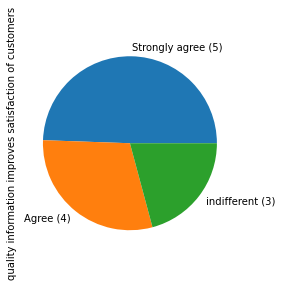

In [160]:
quality_information_improves_satisfaction.plot(kind='pie')

Majority of customers beleive that quality information does improve customer satisfaction and can play a big role in customer retention

36 User derive satisfaction while shopping on a good quality website or application.Lets explore the variable to see what the customers think


In [161]:
df['User derive satisfaction'].value_counts()

Strongly agree (5)    175
Agree (4)              86
Dis-agree (2)           8
Name: User derive satisfaction, dtype: int64

In [162]:
User_satisfaction=df['User derive satisfaction'].value_counts()

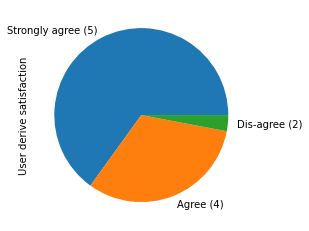

In [163]:
User_satisfaction.plot(kind='pie')

Majority of users confirmed that they derive satisfaction while shopping on a good quality website or application

37 Net Benefit derived from shopping online can lead to users satisfaction.Lets explore on the variable to see how many users agree that net benefit from shopping online leads to customer satisfaction


In [164]:
df['Net benefit'].value_counts()

Strongly agree (5)    164
Agree (4)              54
indifferent (3)        40
Dis-agree (2)          11
Name: Net benefit, dtype: int64

In [165]:
Net_benefit=df['Net benefit'].value_counts()

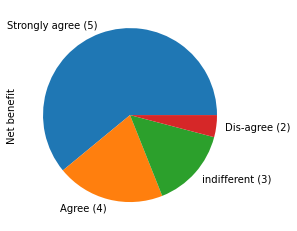

In [166]:
Net_benefit.plot(kind='pie')

The pie chart clearly shows that majority of customers beleive that net benefit does impact customer satisfaction and that Net Benefit derived from shopping online  leads to users satisfaction

38 User satisfaction cannot exist without trust.Lets explore the variable to see how many users give importance to trust as in how many of them beleive that trust is of utmost importance when we talk about user satisfaction


In [167]:
df['User satisfaction without trust'].value_counts()

Strongly agree (5)       122
Agree (4)                117
Strongly disagree (1)     18
Dis-agree (2)              7
indifferent (3)            5
Name: User satisfaction without trust, dtype: int64

In [168]:
User_satisfaction_without_trust=df['User satisfaction without trust'].value_counts()

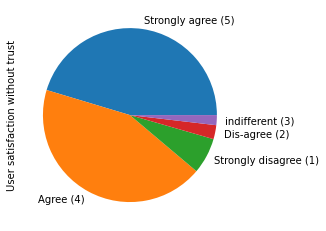

In [169]:
User_satisfaction_without_trust.plot(kind='pie')

Most of the users beleive that user satisfaction does build upon trust

39 Offering a wide variety of listed product in several category.Lets explore the variable to understand how it plays an important role as in if a website gives more offering of listed products , do customers find it better to shop on such websites 


In [170]:
df['Offering variety'].value_counts()

Strongly agree (5)    111
Agree (4)              94
indifferent (3)        57
Dis-agree (2)           7
Name: Offering variety, dtype: int64

In [171]:
Offering_variety=df['Offering variety'].value_counts()

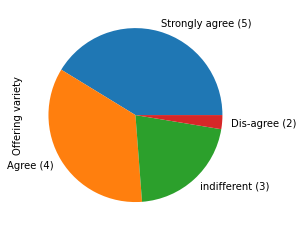

In [172]:
Offering_variety.plot(kind='pie')

The above pie chart shows that majority of people agree with the fact .Also it is indeed a wonderful experience to have offerings of various listed products under several category to be under the same website for being able to serve various needs at one place and making it more convinient

40 Provision of complete and relevant product information


In [173]:
df['Complete and relevant product Info'].value_counts()

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: Complete and relevant product Info, dtype: int64

In [174]:
Complete_product_info=df['Complete and relevant product Info'].value_counts()

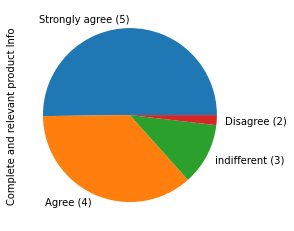

In [175]:
Complete_product_info.plot(kind='pie')

Majority of customers agree on the fact that it helps them when we have complete product information on website 